# Portafolios Financieros: Maximizar el retorno esperado y minimizar el riesgo

## Importación de datos

### Librerías

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

### Trickers: Acciones

**Seguras (Empresas bien establecidas con un historial de crecimiento constante y estabilidad)**
- APPL: Applea
- MSFT: Microsoft
- JNJ: Johnson & Johnson
- PG: Procter & Gamble Co.
- KO: Coca-Cola Co.
- PEP: Pepsi Co.
- V: Visa Inc.
- MA: Mastercard Inc.
- WMT: Walmart Inc.
- UNH: UnitedHealth Group Inc.

**Medias (Gran capitalización con un historial probado de éxito, pero que aún tienen un alto potencial de crecimiento)**
- AMZN: Amazon Inc.
- GOOGL: Google Inc.
- META: Meta Platforms Inc.
- NFLX: Netflix Inc.
- DIS: The Walt Disney Co.
- ADBE: Adobde Inc.
- INTC: Intel Corp.
- ORCL: Oracel Corp.
- CSCO: Cisco Systems Inc.
- NVDA: NVIDIA Corp.

**Riesgosas (Tienen un alto potencial de crecimiento, pero también pueden ser muy volátiles y sensibles a los cambios del mercado)**
- TSLA: Tesla Inc.
- NIO: NIO Inc.
- PLTR: Palantir Technologies Inc.
- SNAP: Snap Inc.
- RIVN: Rivian Automotive Inc.
- COIN: Coinbase Global Inc.
- SPCE: Virgin Galactic Holdings Inc.
- DKNG: DraftKings Inc.
- HOOD: Robinhood Markets Inc.
- AMC: AMC Entertainment Holdings Inc.

In [2]:
seguras = ['AAPL', 'MSFT', 'JNJ', 'PG', 'KO', 'PEP', 'V', 'MA', 'WMT', 'UNH']
medias = ['AMZN', 'GOOGL', 'META', 'NFLX', 'DIS', 'ADBE', 'INTC', 'ORCL', 'CSCO', 'NVDA']
riesgosas = ['TSLA', 'NIO', 'PLTR', 'SNAP', 'RIVN', 'COIN', 'SPCE', 'DKNG', 'HOOD', 'AMC']

### Descarga de datos

Se descargan los datos de la API de **yfinance** correspondientes a los trickers ingresados (Seguras, Medias, Riesgosas)

In [3]:
tickers = seguras + medias + riesgosas

data = yf.download(tickers, period="1y", auto_adjust=False)

# Asegura que las columnas sean MultiIndex
if isinstance(data.columns, pd.MultiIndex):
    # Extrae solo la parte de 'Adj Close' para cada ticker
    historicos = data.xs('Adj Close', axis=1, level=0)
else:
    # En caso de ser solo una acción, devuelve una sola columna
    historicos = data[['Adj Close']]

[*********************100%***********************]  30 of 30 completed


## Preparación de datos

In [4]:
historicos.head()

Ticker,AAPL,ADBE,AMC,AMZN,COIN,CSCO,DIS,DKNG,GOOGL,HOOD,...,PEP,PG,PLTR,RIVN,SNAP,SPCE,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-02,218.836578,526.169983,4.94,167.899994,204.440002,45.414574,88.796196,32.020000,165.856583,17.879999,...,171.782364,165.885559,24.740000,14.720,9.36,6.01,207.669998,578.899109,264.656006,67.764122
2024-08-05,208.295868,509.320007,4.95,161.020004,189.470001,43.545818,87.021660,31.799999,158.482300,16.420000,...,167.922928,163.915359,24.090000,14.610,8.71,5.94,198.880005,559.397400,254.589233,66.902962
2024-08-06,206.265350,514.200012,5.08,161.929993,194.169998,43.954609,89.192741,31.379999,157.526917,17.209999,...,166.427414,163.944611,26.590000,14.800,8.64,5.64,200.639999,557.817200,256.396088,67.051445
2024-08-07,208.843307,513.619995,4.82,162.770004,178.910004,43.915676,85.217384,30.139999,158.173782,17.120001,...,165.752014,165.827026,26.320000,13.785,8.29,5.27,191.759995,555.589294,254.668671,66.229881
2024-08-08,212.317062,530.239990,5.08,165.800003,192.320007,44.606728,85.217384,30.540001,161.248901,17.730000,...,166.311615,166.656052,29.280001,14.720,8.94,6.01,198.839996,555.746338,257.954742,66.972260


### Retorno Diario Histórico

In [63]:
retorno_diario = historicos.pct_change().dropna()
retorno_diario.head()

Ticker,AAPL,ADBE,AMC,AMZN,COIN,CSCO,DIS,DKNG,GOOGL,HOOD,...,PEP,PG,PLTR,RIVN,SNAP,SPCE,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-05,-0.048167,-0.032024,0.002024,-0.040977,-0.073224,-0.041149,-0.019984,-0.006871,-0.044462,-0.081655,...,-0.022467,-0.011877,-0.026273,-0.007473,-0.069444,-0.011647,-0.042327,-0.033688,-0.038037,-0.012708
2024-08-06,-0.009748,0.009581,0.026263,0.005651,0.024806,0.009388,0.024949,-0.013208,-0.006028,0.048112,...,-0.008906,0.000178,0.103778,0.013005,-0.008037,-0.050505,0.008850,-0.002825,0.007097,0.002219
2024-08-07,0.012498,-0.001128,-0.051181,0.005187,-0.078591,-0.000886,-0.044570,-0.039516,0.004106,-0.005229,...,-0.004058,0.011482,-0.010154,-0.068581,-0.040509,-0.065603,-0.044258,-0.003994,-0.006737,-0.012253
2024-08-08,0.016633,0.032359,0.053942,0.018615,0.074954,0.015736,0.000000,0.013271,0.019441,0.035631,...,0.003376,0.004999,0.112462,0.067827,0.078408,0.140418,0.036921,0.000283,0.012903,0.011209
2024-08-09,0.013736,0.011429,-0.015748,0.006876,0.020643,-0.007855,0.002908,-0.006549,0.010122,0.010716,...,0.000116,-0.001931,0.024932,-0.052310,0.012304,0.021631,0.005834,-0.013210,0.001736,0.004286


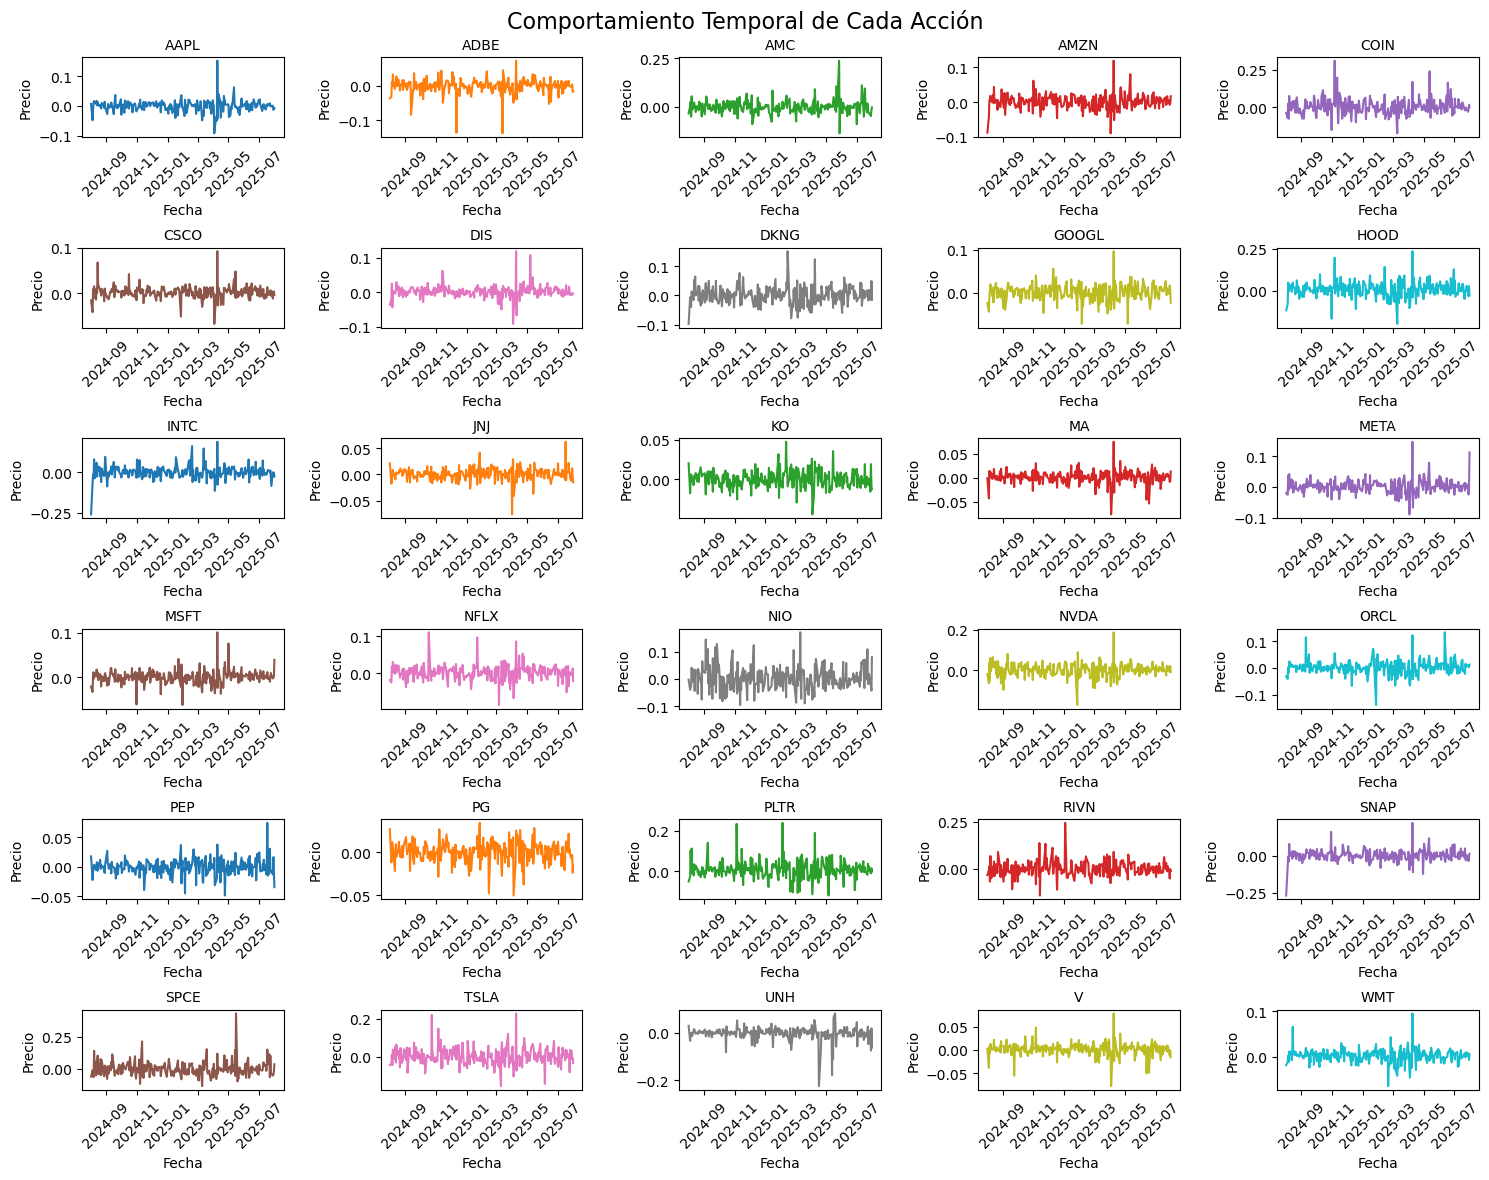

In [ ]:
fig, ax = plt.subplots(6, 5, figsize=(15, 12))
ax = ax.flat
num_col = retorno_diario.columns

for i, col in enumerate(num_col):
    ax[i].plot(retorno_diario.index, retorno_diario[col], 
               color=(list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'])
    ax[i].set_title(col, fontsize=10)
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].set_xlabel("Fecha")
    ax[i].set_ylabel("Precio")

fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Comportamiento Temporal de Cada Acción', fontsize=16)
plt.show()

### Retorno Promedio Esperado (RENDIMIENTO)

Se extrae el retorno simple para utilizarlo en la medición de la rentabilidad del portafolio. El retorno simple corresponde a una comparación entre activos.

&nbsp;&nbsp;&nbsp;&nbsp;$\mathrm{avg}(V_i - V_{i+1})$

Los datos se extraen diariamente y se trasnforman para tenerlos en formato anual

In [23]:
retorno_promedio_esperado = retorno_diario.mean()
retorno_promedio_esperado_anual = retorno_diario.mean() * 249

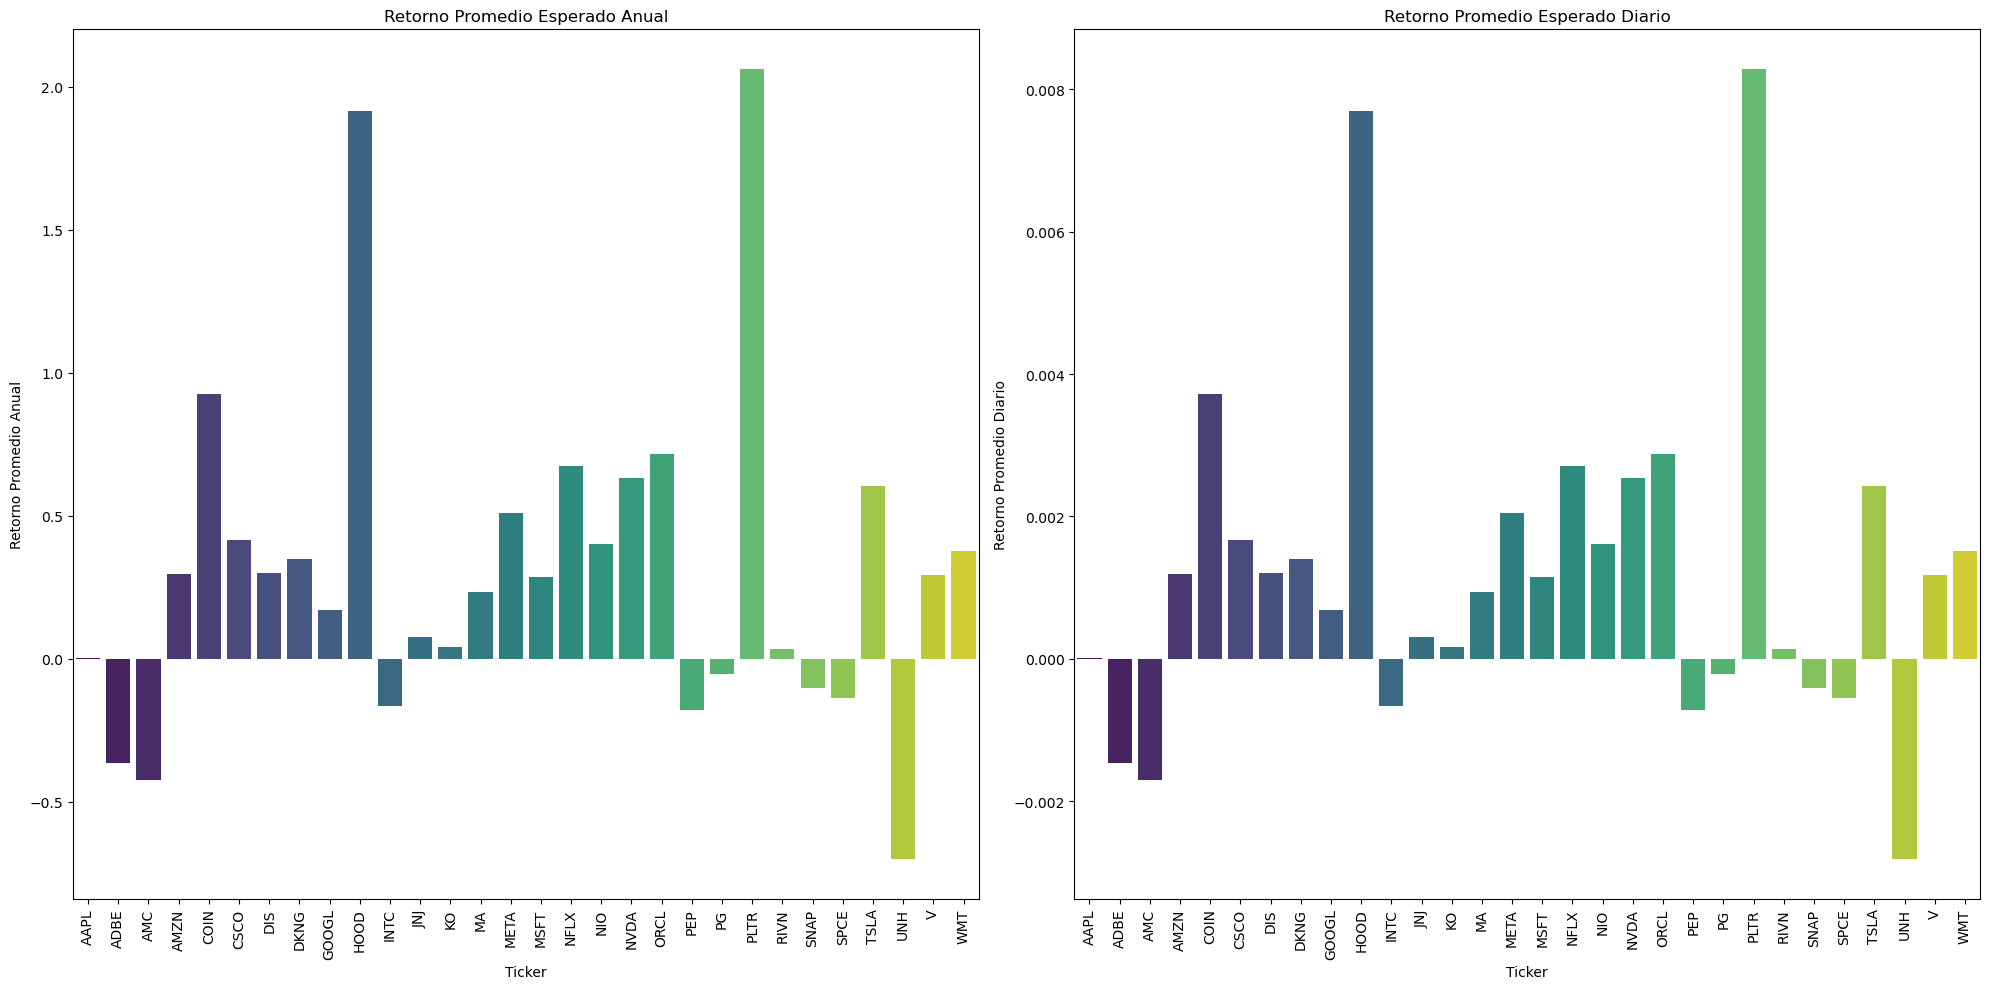

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x=retorno_promedio_esperado_anual.index, y=retorno_promedio_esperado_anual.values, ax=ax1, palette='viridis', hue=retorno_promedio_esperado_anual.index)
ax1.set_title('Retorno Promedio Esperado Anual')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('Retorno Promedio Anual')
ax1.tick_params(axis='x', rotation=90)

sns.barplot(x=retorno_promedio_esperado.index, y=retorno_promedio_esperado.values, ax=ax2, palette='viridis', hue=retorno_promedio_esperado.index)
ax2.set_title('Retorno Promedio Esperado Diario')
ax2.set_xlabel('Ticker')
ax2.set_ylabel('Retorno Promedio Diario')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Desviación Estándar Retorno Logarítmico (RIESGO)

Se extrae el retorno logarítmico para utilizarlo en la medición del riesgo del portafolio extrayendo su desviación estándar. El retorno logarítmico corresponde a las diferencias internas de los valores

&nbsp;&nbsp;&nbsp;&nbsp;$\log\left(\frac{V_i}{V_{i+1}}\right)$

Los datos se extraen diariamente y se trasnforman para tenerlos en formato anual

In [6]:
log_returns = np.log(historicos / historicos.shift(1)).dropna()

In [7]:
riesgo_individual = log_returns.std()
riesgo_individual_anual = log_returns.std() * np.sqrt(249)

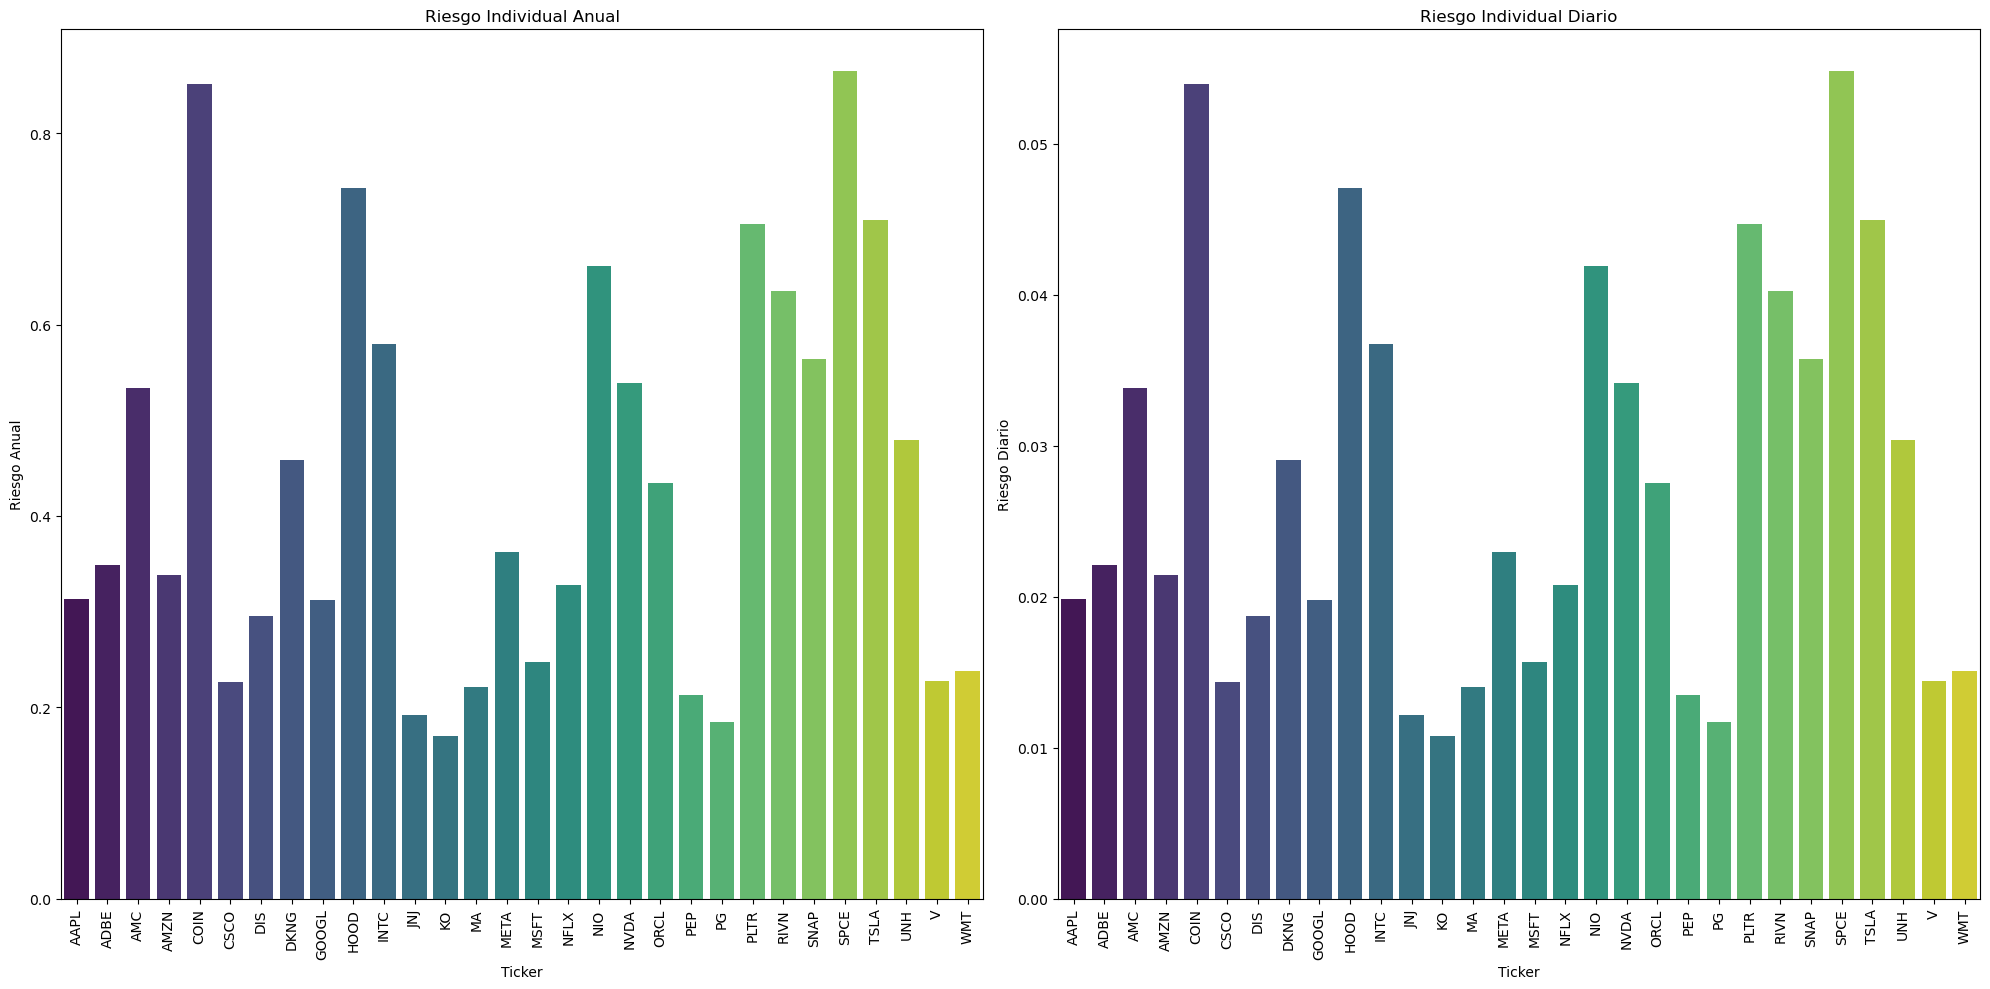

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x=riesgo_individual_anual.index, y=riesgo_individual_anual.values, ax=ax1, palette='viridis', hue=riesgo_individual_anual.index)
ax1.set_title('Riesgo Individual Anual')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('Riesgo Anual')
ax1.tick_params(axis='x', rotation=90)

sns.barplot(x=riesgo_individual.index, y=riesgo_individual.values, ax=ax2, palette='viridis', hue=riesgo_individual.index)
ax2.set_title('Riesgo Individual Diario')
ax2.set_xlabel('Ticker')
ax2.set_ylabel('Riesgo Diario')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## Generación de Portafolio

### Generación de Población

Cada **población está compuesta por N individuos (portafolios)** a los que se les evalúa el rendimiento y el riesgo de forma independiente. 

- Se genera una **población** donde se escogen de forma aleatoria, dentro de los Trickers ingresados, las acciones correspondientes a cada **individuo** utilizando el método:
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;`random.sample`
<br>
<br>

- Posteriormente, se generan los pesos aleatoriamente que sumen hasta 1 para cada acción utilizando el método:
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;`np.random.dirichlet`

In [64]:
def poblacion_inicial(individuos, tickers, cantidad_acciones):
    poblacion = []
    for _ in range(individuos):
        # Selecciona acciones aleatorias sin repetición (Según la cantidad de acciones ingresadas)
        acciones = random.sample(tickers, cantidad_acciones)
        # Genera pesos aleatorios que sumen 1 (Según la cantidad de acciones ingresadas)
        pesos = np.random.dirichlet(np.ones(cantidad_acciones))
        poblacion.append({'acciones': acciones, 'pesos': pesos})
    return poblacion

### Función de Calidad

Se evalúa la función de calidad de cada portafolio con respecto al rendimiento y el riesgo (Por separado). Las funciones de calidad definidas son:

- **RENDIMIENTO:** $\sum P_i V_i$

- **RIESGO:** $\left( \sum P_i \cdot \sigma_i \right)^2$

Se utiliza el método `np.dot()` de numpy para realizar el producto entre 2 arreglos

In [80]:
def funcion_de_calidad(individuo, retorno_esperado_anual, riesgo_individual_anual):
    acciones = individuo['acciones']
    pesos = individuo['pesos']
    
    mean = retorno_esperado_anual[acciones].values
    std = riesgo_individual_anual[acciones].values
    
    rendimiento = np.dot(mean, pesos)
    riesgo = (np.dot(pesos, std)) ** 2
    
    return rendimiento, riesgo

### Cálculo de probabilidades acumuladas

- `calcular_probabilidades_max`: se calculan las probabilidades enfocadas al rendimiento máximo según la función de calidad
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\frac{f}{\sum f}$
<br>
<br>
- `calcular_probabilidades_min`: se calculan las probabilidades enfocadas el riesgo mínimo según la función de calidad
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\frac{\frac{1}{f}}{\sum \frac{1}{f}}$


In [66]:
def calcular_probabilidades_max(fitness):
    f = np.array(fitness)
    # Asegura que todos los valores sean >= 0
    f = f - np.min(f) + 1e-6

    return f / np.sum(f)

def calcular_probabilidades_min(fitness):
    f = np.array(fitness)
    # Asegura que todos los valores sean >= 0 y evita división por cero (epsilon = 1e-6)
    f = f - np.min(f) + 1e-6

    return (1 / f) / np.sum(1 / f)

### Selección por ruleta

- `seleccion_por_ruleta_max`: se tiene este método de selección por ruleta para la selección de dos padres para el rendimiento
<br>
<br>
- `seleccion_por_ruleta_min`: se tiene este método de selección por ruleta para la selección de dos padres para el riesgo
<br>
<br>
Se utiliza el método `np.cumsum()` para generar la probabilidad acumulada

In [ ]:
def seleccion_por_ruleta_max(poblacion, fitness):
    probabilidades_max = calcular_probabilidades_max(fitness)
    prob_acumulada = np.cumsum(probabilidades_max)

    padres = []
    for _ in range(2):
        r = np.random.uniform()
        for i, prob in enumerate(prob_acumulada):
            if r <= prob:
                padres.append(poblacion[i])
                break

    return padres

def seleccion_por_ruleta_min(poblacion, fitness):
    probabilidades_min = calcular_probabilidades_min(fitness)
    prob_acumulada = np.cumsum(probabilidades_min)

    padres = []
    for _ in range(2):
        r = np.random.uniform()
        for i, prob in enumerate(prob_acumulada):
            if r <= prob:
                padres.append(poblacion[i])
                break

    return padres

### Cruce (Cromosomas Ordenados)

Se está utilizando el método de cromosomas ordenados que consiste en realizar puntos de corte aleatorios y diferentes para cada padre. A partir de eso se añaden las acciones sobrantes que no se repitan pertenecientes al otro padre.
<br>
<br>
Se utilizan los pesos de las acciones de los padres para la creación del hijo y se normaliza para que los pesos sumen 1 utilizando la siguiente fórmula:
<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;$w_i = \frac{w_i}{\sum w_j}$

In [ ]:
def cruce_ordenado(padre1, padre2):
    n = len(padre1)

    # Se extraen los tickers de cada padre (Ejemplo: ['APPL', 'MSFT', ...])
    tickers1 = [acciones[0] for acciones in padre1]
    tickers2 = [acciones[0] for acciones in padre2]
    
    # Se extraen los pesos de cada padre (Ejemplo: [0.2, 0.3, ...])
    pesos1 = [acciones[1] for acciones in padre1]
    pesos2 = [acciones[1] for acciones in padre2]

    # Se seleccionan dos puntos de corte alatorios (Diferentes para cada padre)
    punto1, punto2 = sorted(random.sample(range(n), 2))

    # Se extrae la sección del primer padre entre los puntos de corte
    medio = tickers1[punto1:punto2+1]

    # Se construye la lista restante de tickers del segundo padre, excluyendo los tickers del medio (Cromosomas resultantes del primer padre)
    restante = [acciones for acciones in tickers2 if acciones not in medio]

    # Se construye el hijo combinando la sección del primer padre con la lista restante del segundo padre
    hijo_tickers = restante[:punto1] + medio + restante[punto1:]

    # Construcción del hijo (A partir de los pesos de los padres)
    hijo = []
    for accion in hijo_tickers:
        if accion in pesos1:
            peso = pesos1[accion]
        else:
            peso = pesos2[accion]
        hijo.append((accion, peso))

    # Se normalizan los pesos del hijo para que sumen 1
    suma_pesos = sum(p[1] for p in hijo)
    hijo = [(accion, peso / suma_pesos) for accion, peso in hijo]
    
    return hijo

### Mutación (Mutación por Permutación)

Se implementa la mutación por permutación que consiste en la elección aleatoria de dos cromosomas (acciones) del portafolio y las intercambia de posición entre si para realizar la mutación. Solo se realiza la mutación si se cumple con que el aleatorio sea menor a la tasa de mutación que en este caso es de `0.1`

In [ ]:
def mutacion_permutacion(individuo, tasa_mutacion=0.1):
    n = len(individuo)
    if np.random.rand() < tasa_mutacion:
        # Escoge dos índices (cromosomas) aleatorios dentro del individuo
        i, j = random.sample(range(n), 2)
        # Intercambia los cromosomas en las poblaciones
        individuo[i], individuo[j] = individuo[j], individuo[i]
    
    return individuo

## Resultados

In [ ]:
def algoritmo_genetico(tickers, retorno_esperado_anual, riesgo_individual_anual, generaciones, individuos, cantidad_acciones, tasa_mutacion=0.1):

    # ---------------------------- RENDIMIENTO ---------------------------- 

    # Inicializa población para el rendimiento
    poblacion_rendimiento = poblacion_inicial(individuos, tickers, cantidad_acciones)
    historial_rend = []
    
    for generacion in range(generaciones):
            rendimiento_portafolio = []
            riesgo_portafolio = []

            # Calcula el rendimiento y riesgo de cada portafolio en cada población de rendimiento
            for ind in poblacion_rendimiento:
                rendimiento, riesgo = funcion_de_calidad(ind, retorno_esperado_anual, riesgo_individual_anual)
                rendimiento_portafolio.append(rendimiento)
                riesgo_portafolio.append(riesgo)

            # Se identifica el mejor portafolio por rendimiento
            mejor_rendimiento = np.argmax(rendimiento_portafolio)

            # Se guarda el mejor portafolio de rendimiento
            historial_rend.append({
                'mejor_rend': (poblacion_rendimiento[mejor_rendimiento], 
                            rendimiento_portafolio[mejor_rendimiento], 
                            riesgo_portafolio[mejor_rendimiento])
            })

            # ---------------------------- SELECCIÓN POR RENDIMIENTO (MAX) ----------------------------
            nueva_poblacion = []
            while len(nueva_poblacion) < individuos:
                p1, p2 = seleccion_por_ruleta_max(poblacion_rendimiento, rendimiento_portafolio)
                hijo = cruce_ordenado(list(zip(p1['acciones'], p1['pesos'])),
                                    list(zip(p2['acciones'], p2['pesos'])))
                hijo = mutacion_permutacion(hijo, tasa_mutacion)
                acciones_hijo = [acciones[0] for acciones in hijo]
                pesos_hijo = [acciones[1] for acciones in hijo]
                nueva_poblacion.append({'acciones': acciones_hijo, 'pesos': np.array(pesos_hijo)})

            poblacion_rendimiento = nueva_poblacion



    # ---------------------------- RIESGO ----------------------------

    # Inicializa población para el riesgo
    poblacion_riesgo = poblacion_inicial(individuos, tickers, cantidad_acciones)
    historial_riesgo = []

    for generacion in range(generaciones):
            rendimiento_portafolio = []
            riesgo_portafolio = []

            # Calcula el rendimiento y riesgo de cada portafolio en cada población de riesgo
            for ind in poblacion_riesgo:
                rendimiento, riesgo = funcion_de_calidad(ind, retorno_esperado_anual, riesgo_individual_anual)
                rendimiento_portafolio.append(rendimiento)
                riesgo_portafolio.append(riesgo)

            # Se identifica el mejor portafolio por riesgo
            mejor_riesgo = np.argmin(riesgo_portafolio)

            # Se guarda el mejor portafolio de riesgo
            historial_riesgo.append({
                'mejor_riesgo': (poblacion_riesgo[mejor_riesgo], 
                                rendimiento_portafolio[mejor_riesgo], 
                                riesgo_portafolio[mejor_riesgo])
            })

            # ---------------------------- SELECCIÓN POR RIESGO (MIN) ----------------------------
            nueva_poblacion = []
            while len(nueva_poblacion) < individuos:
                p1, p2 = seleccion_por_ruleta_min(poblacion_riesgo, riesgo_portafolio)
                hijo = cruce_ordenado(list(zip(p1['acciones'], p1['pesos'])),
                                    list(zip(p2['acciones'], p2['pesos'])))
                hijo = mutacion_permutacion(hijo, tasa_mutacion)
                acciones_hijo = [acciones[0] for acciones in hijo]
                pesos_hijo = [acciones[1] for acciones in hijo]
                nueva_poblacion.append({'acciones': acciones_hijo, 'pesos': np.array(pesos_hijo)})

            poblacion_riesgo = nueva_poblacion


    # ---------------------------- RESULTADOS FINALES ----------------------------
    mejor_rend = max(historial_rend, key=lambda x: x['mejor_rend'][1])
    mejor_riesgo = min(historial_riesgo, key=lambda x: x['mejor_riesgo'][2])

    # ---------------------------- Mostrar mejor rendimiento ----------------------------
    print("------------------------------------------------------------------------------------")
    print("MEJOR PORTAFOLIO POR RENDIMIENTO ESPERADO")
    print("------------------------------------------------------------------------------------")
    individuo, rendimiento, riesgo = mejor_rend['mejor_rend']
    for accion, peso in zip(individuo['acciones'], individuo['pesos']):
        print(f"{accion:5s} | Peso: {peso:.4f}")
    print(f"Rendimiento esperado: {rendimiento:.4f}")
    print(f"Riesgo estimado     : {riesgo:.4f}")

    # ---------------------------- Mostrar menor riesgo ----------------------------
    print("\n" + "------------------------------------------------------------------------------------")
    print("MEJOR PORTAFOLIO POR MENOR RIESGO")
    print("------------------------------------------------------------------------------------")
    individuo, rendimiento, riesgo = mejor_riesgo['mejor_riesgo']
    for accion, peso in zip(individuo['acciones'], individuo['pesos']):
        print(f"{accion:5s} | Peso: {peso:.4f}")
    print(f"Rendimiento esperado: {rendimiento:.4f}")
    print(f"Riesgo estimado     : {riesgo:.4f}")
    print("------------------------------------------------------------------------------------")

    return historial_rend, historial_riesgo

In [85]:
historial = algoritmo_genetico(
    tickers,
    retorno_promedio_esperado_anual,
    riesgo_individual_anual,
    generaciones=1000,
    individuos=30,
    cantidad_acciones=10,
    tasa_mutacion=0.1
)

------------------------------------------------------------------------------------
MEJOR PORTAFOLIO POR RENDIMIENTO ESPERADO
------------------------------------------------------------------------------------
PLTR  | Peso: 0.7605
TSLA  | Peso: 0.0451
CSCO  | Peso: 0.0381
ORCL  | Peso: 0.0262
JNJ   | Peso: 0.0127
V     | Peso: 0.0655
NFLX  | Peso: 0.0049
HOOD  | Peso: 0.0352
MSFT  | Peso: 0.0101
COIN  | Peso: 0.0017
Rendimiento esperado: 1.7486
Riesgo estimado     : 0.4057

------------------------------------------------------------------------------------
MEJOR PORTAFOLIO POR MENOR RIESGO
------------------------------------------------------------------------------------
MA    | Peso: 0.0170
NIO   | Peso: 0.0068
MSFT  | Peso: 0.0330
AMC   | Peso: 0.0146
GOOGL | Peso: 0.0087
RIVN  | Peso: 0.0053
V     | Peso: 0.1786
WMT   | Peso: 0.1453
KO    | Peso: 0.5585
PEP   | Peso: 0.0322
Rendimiento esperado: 0.1338
Riesgo estimado     : 0.0430
-----------------------------------------------